# Forecast and Predictions Project

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? For a gym, it makes sense to say a customer has left if they don't come for a month. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy. 

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math


## Download the data

In [51]:
# read in the data and load into DataFrame
data = pd.read_csv('/datasets/gym_churn_us.csv')

# rename columns to be more legible 
data.columns = ['gender', 'near_location', 'employer_partner', 'friend_promo', 'phone_exists', 'total_contract_period_months', 
               'group_sessions', 'age', 'other_services_total_dollars', 'contract_remaining_months', 'lifetime_months',
               'avg_visits_per_week_total', 'avg_visits_per_week_last_month', 'churn']

display(data)
print(data.info())

,gender,near_location,employer_partner,friend_promo,phone_exists,total_contract_period_months,group_sessions,age,other_services_total_dollars,contract_remaining_months,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                            4000 non-null int64
near_location                     4000 non-null int64
employer_partner                  4000 non-null int64
friend_promo                      4000 non-null int64
phone_exists                      4000 non-null int64
total_contract_period_months      4000 non-null int64
group_sessions                    4000 non-null int64
age                               4000 non-null int64
other_services_total_dollars      4000 non-null float64
contract_remaining_months         4000 non-null float64
lifetime_months                   4000 non-null int64
avg_visits_per_week_total         4000 non-null float64
avg_visits_per_week_last_month    4000 non-null float64
churn                             4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


After loading the data from a CSV file into a Dataframe, I renamed the columns to give them more legible titles. 

## Exploratory Data Analysis

### Does it contain any missing features? Study the mean values and standard deviation 

In [52]:
# Find and deal with missing values
display(data.describe())

,gender,near_location,employer_partner,friend_promo,phone_exists,total_contract_period_months,group_sessions,age,other_services_total_dollars,contract_remaining_months,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Studying the descibe method showed that there were no missing values (like NaN). 

It also showed that there were more men than women in the dataset, most customers lived near a gym location, an almost equal amount of customers are employees of a partner company and are not employees, most customers were not recommended with a promotional code from a friend, the dataset contains almost all of the phone numbers for customers, more customers do not attend group sessions, the average number of months a customer has had a gym contract is almost 5 months, most customers are around 30 years old, most customers have about 4 months remaining on their contract, most customers have only had a contract for the past 4 months, the average umber of customers come almost twice a week and the churn rate leans towards 0 which means that most customers did not churn (did not stop subscribing).

### Look at the mean feature values in two groups: for those who left and for those who stayed.

In [53]:
churn_data = data.groupby('churn').mean()
display(churn_data)

,gender,near_location,employer_partner,friend_promo,phone_exists,total_contract_period_months,group_sessions,age,other_services_total_dollars,contract_remaining_months,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


To look at the mean feature values in the groups of those who left (did not renew membership) and those who stayed (did renew membership), I grouped the data by churn rate (where a churn rate of 0 means did not churn and a churn rate of 1 means did churn) and calculated the mean value for each feature. 

This data grouping shows that an equal amount of male and female customers decide to renew or not renew. 

It shows that most of the people who do not renew do not live near a gym location, are not employees of a partner company and were not given a promotional code by a friend. 

Those who decide not to renew their membership had a 6 month long contract, did attend group sessions, were almost 30 years old, spent over 150 dollars on additional gym services, had about 5 months remaining on the contract, had been a member for almost 5 months and visit about twice a week. 

Those who decided to renew their membership had an almost 2 month long contract, did not attend group sessions, were about 27 years old, spent less than 150 dollars on additional gym services, had about 1.5 months remaining in the contract, had been a member for 1 month and visit the gym an average of once a week. 

### Plot bar histograms and feature distributions for those who left and those who stayed.

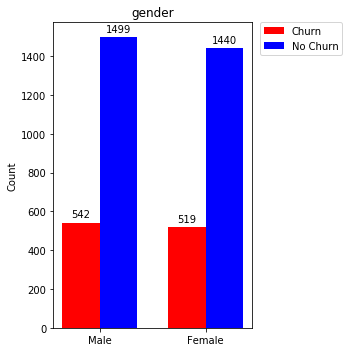

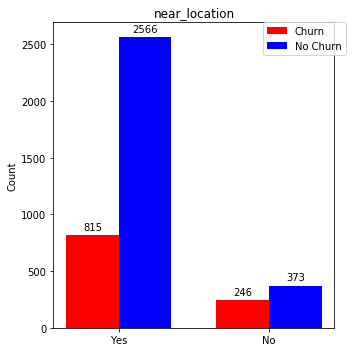

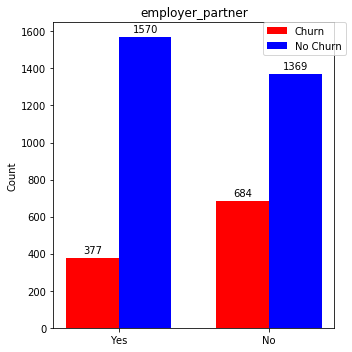

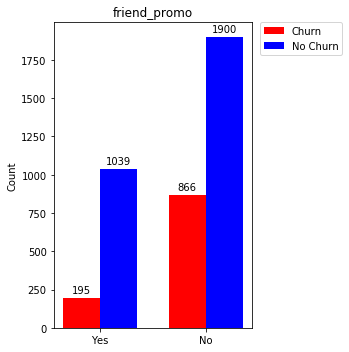

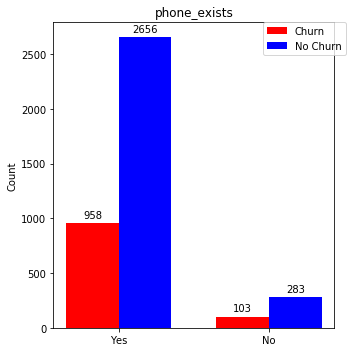

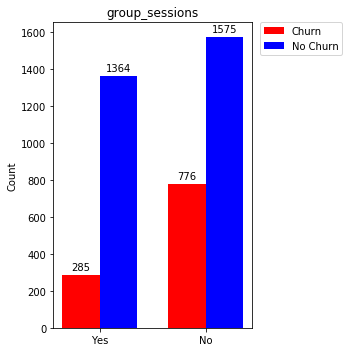

In [54]:
# define churned and not churned dataframes
user_churned = data[data['churn'] == 1]
user_not_churned = data[data['churn'] == 0]

# method to label bar graphs
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# columns with values of 0 or 1 = BAR HISTOGRAM
binary_cols = ['gender','near_location', 'employer_partner', 'friend_promo', 'phone_exists', 'group_sessions']

for col in binary_cols:
    
    # create subplit
    fig = plt.figure(figsize=(5,5))
    ax = fig.subplots()
    
    # define x axis labels based on feature
    if col == 'gender':
        x = ['Male', 'Female']
        labels = ['Male', 'Female']
        
    if col == 'near_location' or col == 'employer_partner' or col == 'friend_promo' or col == 'phone_exists' or col == 'group_sessions':
        x = ['Yes', 'No']
        labels = ['Yes', 'No']
        
    # create array of churned data
    y_churned = [user_churned[user_churned[col] == 1][col].count(),
           user_churned[user_churned[col] == 0][col].count()]

    # create array of unchurned data
    y_not_churned = [user_not_churned[user_not_churned[col] == 1][col].count(),
           user_not_churned[user_not_churned[col] == 0][col].count()]
    
    # the label locations
    x = np.arange(len(labels)) 
    
    # the width of the bars
    width = 0.35 

    # plot bar graphs
    rects1 = ax.bar(x - width/2, y_churned, width, color = 'red', label='Churn')
    rects2 = ax.bar(x + width/2, y_not_churned, width, color='blue',label='No Churn')

    # edit labels and formalities
    ax.set_ylabel('Count')
    ax.set_title(col)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

    # add number
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()


To plot the features by those who churned (stopped subscribing) and those who did not churn (continued subscribing), I started by plotting the features with binary values on bar graphs. For each feature, I graphed the number of values for both churn and non churn.

For gender, the graph indicates that a very similar number of males and females churned and did not churn. Meaning there is no correlation between gender and churning.

For near_location (whether the customer lives near a gym location or not), there is a large amount customers who did not churn and who live near a gym location. This makes sense: if you live nearby a gym, it is easier to get to, it is more of an incentive to stay. It is aso interesting to note that for those customers who do not live near a gym location, the churn and non churn count is low which might just mean that few people sign up for a gym membership who do not live near a gym location.

For employer_partner (whether the customer is an employee of a company that the gym partners with or not), there is a large amount of customers who do not churn for both customers who are and are not employees. This could indicate that being an employee of a partner company does not have much of an affect on customers. However, almost double of users who churned were not employees of a partner company which shows that this feature has an impact on customer churn.

For friend_promo (whether the customer joined the gym because of a promotion they got from a friend), where there is a very large number of users who did not churn and did not get a promo code from a friend. But there is also a significant number of users who had a promo code and did not churn - meaning a promo code is an incentive to stay. Also, there is about 5 times the number of customers who churned without a promo code than there is customers who churned with a promo code. All in all, having a promo code from a friend does have an impact on churn.

For phone_exists (whether there is a customer phone number on file), it shows that they have the phone number of almost all of customers who subscribe to the gym and that more than double of customers whose phone nuber is on record did not churn. This is probably because the gym reached out to them in an effort to remind them to renew their subscription or convince them to do so.

For group_sessions (whether the customer participated in group sessions), it shows that there is an equal number of those who did not churn and those who did and did not attend group sessions. It is notable that customers are more likely to churn (by double) if they do not attend group sessions.

In [55]:
# columns with numerical values = FEATURE DISTRIBUTIONS
cols = ['total_contract_period_months', 'age', 'other_services_total_dollars', 'contract_remaining_months', 
        'lifetime_months', 'avg_visits_per_week_total', 'avg_visits_per_week_last_month']

fig = make_subplots(rows=7, cols=1, subplot_titles=('Age',
                                                    'Total Contract Period (Months)',
                                                    'Contract Remaining (Months)',
                                                    'Lifetime (Months)', 
                                                    'Other Services Total (Dollars)',
                                                    'Average Visits Per Week (Total)',
                                                    'Average Visits Per Week (Last Month)'
                                                   ))
# age
fig.add_trace(go.Histogram(
    x = user_churned['age'],
    name = 'Churn',
    histnorm = 'density',
    marker_color='red',
    showlegend=True),row=1, col=1)
fig.add_trace(go.Histogram(
    x = user_not_churned['age'],
    name= 'No churn',
    histnorm = 'density',
    marker_color='blue',
    showlegend=True),row=1, col=1)

# total_contract_period_months
fig.add_trace(go.Bar(
    x=[1,6,12],
    y=[user_churned[user_churned['total_contract_period_months'] == 1]['total_contract_period_months'].count(),
       user_churned[user_churned['total_contract_period_months'] == 6]['total_contract_period_months'].count(),
       user_churned[user_churned['total_contract_period_months'] == 12]['total_contract_period_months'].count()],
    name='Churn',
    marker_color='red', showlegend=False), row=2, col=1)
fig.add_trace(go.Bar(
    x=[1,6,12],
    y=[user_not_churned[user_not_churned['total_contract_period_months'] == 1]['total_contract_period_months'].count(),
       user_not_churned[user_not_churned['total_contract_period_months'] == 6]['total_contract_period_months'].count(),
       user_not_churned[user_not_churned['total_contract_period_months'] == 12]['total_contract_period_months'].count()],
    name='No churn',
    marker_color='blue', showlegend=False), row=2, col=1)

# contract_remaining_months
fig.add_trace(go.Bar(
    x=[1,2,3,4,5,6,7,8,9,10,11,12],
    y=[user_churned[user_churned['contract_remaining_months'] == 1]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 2]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 3]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 4]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 5]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 6]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 7]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 8]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 9]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 10]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 11]['contract_remaining_months'].count(),
       user_churned[user_churned['contract_remaining_months'] == 12]['contract_remaining_months'].count()],
    name='Churn',
    marker_color='red', showlegend=False), row=3, col=1)
fig.add_trace(go.Bar(
    x=[1,2,3,4,5,6,7,8,9,10,11,12],
    y=[user_not_churned[user_not_churned['contract_remaining_months'] == 1]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 2]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 3]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 4]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 5]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 6]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 7]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 8]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 9]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 10]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 11]['contract_remaining_months'].count(),
       user_not_churned[user_not_churned['contract_remaining_months'] == 12]['contract_remaining_months'].count()],
    name='No churn',
    marker_color='blue', showlegend=False), row=3, col=1)

# lifetime_months
fig.add_trace(go.Histogram(
    x = user_churned['lifetime_months'],
    name = 'Churn',
    histnorm = 'density',
    marker_color='red',
    showlegend=False),row=4, col=1)
fig.add_trace(go.Histogram(
    x = user_not_churned['lifetime_months'],
    name= 'No churn',
    histnorm = 'density',
    marker_color='blue',
    showlegend=False),row=4, col=1)

# other_services_total_dollars
fig.add_trace(go.Histogram(
    x = user_churned['other_services_total_dollars'],
    name = 'Churn',
    histnorm = 'density',
    marker_color='red',
    showlegend=False),row=5, col=1)
fig.add_trace(go.Histogram(
    x = user_not_churned['other_services_total_dollars'],
    name= 'No churn',
    histnorm = 'density',
    marker_color='blue',
    showlegend=False),row=5, col=1)

# avg_visits_per_week_total
fig.add_trace(go.Histogram(
    x = user_churned['avg_visits_per_week_total'],
    name = 'Churn',
    histnorm = 'density',
    marker_color='red',
    showlegend=False),row=6, col=1)
fig.add_trace(go.Histogram(
    x = user_not_churned['avg_visits_per_week_total'],
    name= 'No churn',
    histnorm = 'density',
    marker_color='blue',
    showlegend=False),row=6, col=1)

# avg_visits_per_week_last_month
fig.add_trace(go.Histogram(
    x = user_churned['avg_visits_per_week_last_month'],
    name = 'Churn',
    histnorm = 'density',
    marker_color='red',
    showlegend=False),row=7, col=1)
fig.add_trace(go.Histogram(
    x = user_not_churned['avg_visits_per_week_last_month'],
    name= 'No churn',
    histnorm = 'density',
    marker_color='blue',
    showlegend=False),row=7, col=1)

# plot all of them
fig.update_layout(height=1700, width=1000,
              title_text="Destribution of features")
fig.show()


To plot the features by those who churned (stopped subscribing) and those who did not churn (continued subscribing), I started by plotting the features with continuous numerical values on histograms. For each feature, I graphed the number of values for both churn and non churn.

For age, it shows that younger customers (between the ages of 20 and 25) tended to churn. After the age of 25, customers tended not to churn. 

FOr total_contract_period_months (the number of months the customers entire contract is), it shows that most customers who had a 1 month contract (possible a trial period), ended up churning. However, many more of the customers who had the same 1 month contract did not churn so perhaps this trial period worked for some customers.

For contract_remaining_months (the number of months remaining on a customers contract is0, it shows that customers are more likely to churn when they have to choose whether to renew their contract or not (at 1 month remaining on the contract). Customers who do not churn renew their contract at either 1 month, 6 months or 12 months.

For lifetime_months (the number of months a customer has been a member of the gym for the entire lifetime), it shows that most users who churn have been members for less than 3 months. However, many users who do not churn fall under 2-5 months of lifetime. This 2 month lifetime mark seems to be a major turning point for customers.

For other_services_total_dollars (the amount of money customers spent on other services at the gym), it shows that customers who churned did not end up spending a lot of money on other services, while customers who did not churn did spend a considerable amount more on other gym services.

For average_visits_per_week_total (for the customers lifetime, the averge number of visits per week), it shows that customers who did not churn visited the gym must more frequently on a weekly basis than customers who churned. The highest point for customers who did not churn is between 1.8 and 2.5 weekly visits, while the highest point for customers who did churn is 1 to 1.8.

For average_visits_per_week_month (for the last month, the average number of visits per week), it shows that a huge amount of customers who churn did not visit the gym last month or visited the gym less than once a week. 


### Build a correlation matrix

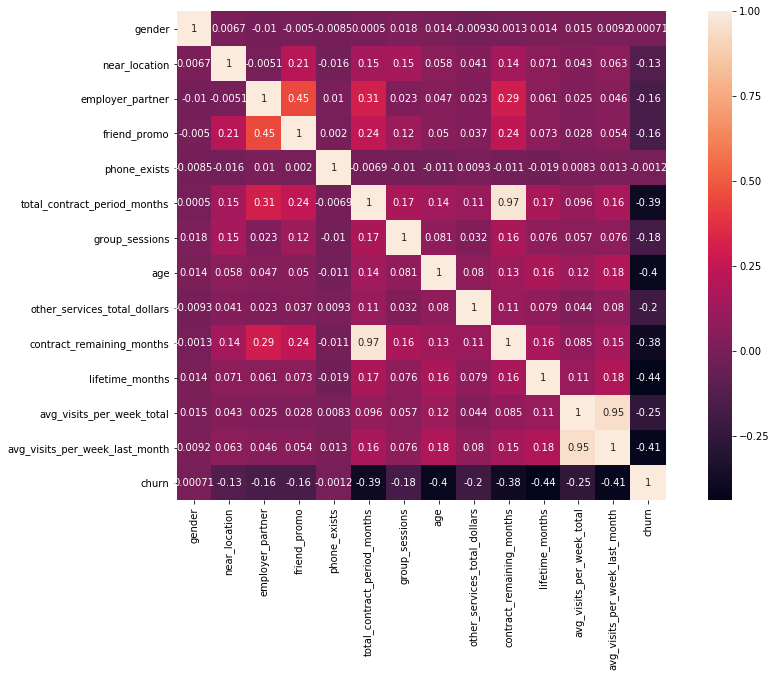

In [56]:
cm = data.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(cm, annot=True, square=True)
plt.show()

This correlation matric shows the features that have the strongest correlation with target variable and the features that strongly correlate with each other. The features who have a strong positive correlation with other features are total_contract_period_months and contract_remaining_months (the number of months remaining on the contract compared with the total number of months that the contract is for) and avg_visits_per_week_last_month and avg_visits_per_week_total (the average number of weekly visits in the past month compared to the average number of weekly visits during the total time). It makes sense that these are stronly related since the monthly calculation is a portion of the total calculation. The features that have a strong negative correlation with the target variable (churn) are total_contract_period_months, age, contract_remaining_months, lifetime_months, avg_visits_per_week_total, avg_visits_per_week_last_month. 

## Build a model to predict churn

### Build a binary classification model for customers where the target feature is the user's leaving next month.

In [57]:
# features (X matrix)
X = data.drop(['churn'], axis=1)

# target variable (y)
y = data['churn']

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# Create scaler object and apply it to train set
scaler = StandardScaler()

# Train scaler and transform the matric for train set
X_train_st = scaler.fit_transform(X_train)

# apply standardization of feature matric for test set
X_test_st = scaler.transform(X_test)

# define the models to compare
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# function that predicts model by taking data as input and outputting metrics
def make_prediction(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: ', model)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\n')

# output metric for both models
for i in models:
    make_prediction(i, X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.93
Precision: 0.89
Recall: 0.84


Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy: 0.92
Precision: 0.89
Recall: 0.79




I compared two models on the train set where the target feature is the customer train set: Logistic Regression and Random Forest Classifier. 

Accuracy is the share of accurate predictions among all predictions where the close to 1, the better. For this metric, Logistic Regression has a better score.

Precision tells us what share of predictions in class 1 are true by looking at the share of correct answers only in the target class, where the locse to 1 the better. For this metric, Logistic Regression has a better score.

Recall aims at minimizing the opposite risks by demonstrating the number of real class 1 objects you were able to discover with your model where the closer to 1, the better. For this metric, Logistic Regression has a better score.  

All in all, the Logistic Regression model gave better results.

## Create user clusters

### Identify object (user) clusters

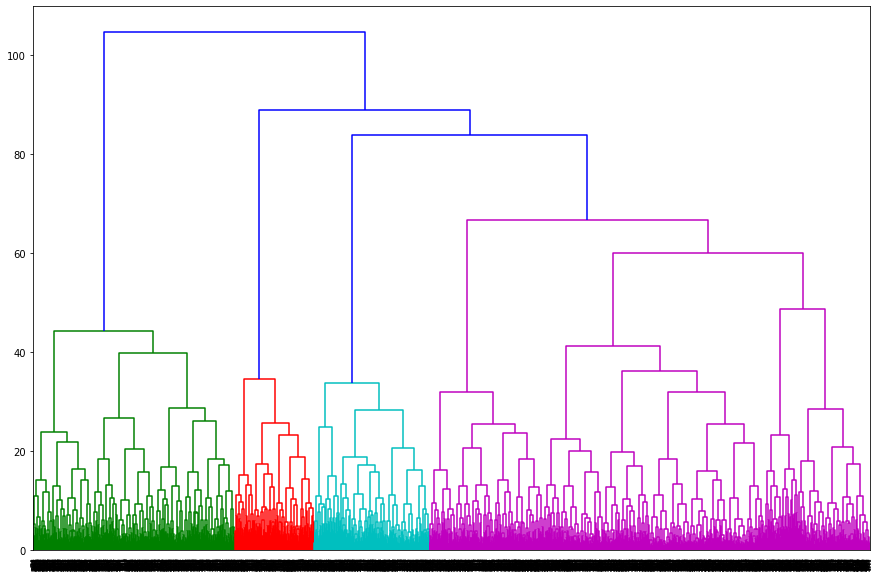

,gender,near_location,employer_partner,friend_promo,phone_exists,total_contract_period_months,group_sessions,age,other_services_total_dollars,contract_remaining_months,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month,churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [58]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Build a matrix of distances based on the standardized feature matrix
linked = linkage(x_sc, method='ward')

# Plot a dendrogram
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()

# Train the clustering model with the K-means algorithm and predict customer clusters. 
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)

# calculate silhouette score
sil_score = silhouette_score(x_sc, labels)

# Look at the mean feature values for clusters
data['cluster'] = labels

cluster_data = data.groupby('cluster').mean()
display(cluster_data)

In order to use K-Means clustering (which groups objects step by step under the assumption that the number of user clusters is already known), we must determine the number of user clusters that can be identified. This can be done using a dendrogram which shows different clusters and suggests an optimal number. The dendrogram for this data has suggested that the optimal number of clusters is 4.

After adding the cluster number to each data entry, I grouped data by cluster and calculated the mean for each feature values. Some interesting things: cluster 1 contains users who do not have a phone number on file and cluster 1 contains users who do not live near a location. As we saw in feature graphs, these two features greatly impact churn and furthermore, the mean churn value for these clusters are close to 1 which means most users in these clusters churned / stopped subscribing. The highest churn mean value is cluster 3 where all users live near a gym location: this cluster also had the smallest total contract length and we saw previously that most people who have a 1-2 month contract churn. The clusters with the smallest churn are 0 and 4: gender is split equally, most users live near a gym, almost all phone number exist and they spend the most on additional gym services.

### Plot distributions of features for the clusters.

In [49]:
# columns for overlap
numerical_col = ['age','other_services_total_dollars','lifetime_months','avg_visits_per_week_total','avg_visits_per_week_last_month']

# create subplots
fig = make_subplots(rows=3, cols=2,subplot_titles=numerical_col)

r = 1
c = 1
idx = 1
legend = True

# for every plot
for i in numerical_col:
    # add cluster data
    fig.add_trace(go.Histogram(x=data.query('cluster == 0')[i], name='cluster0', legendgroup='cluster0',
                               marker = {'color':'Red'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=data.query('cluster == 1')[i],name='cluster1', legendgroup='cluster1',
                               marker = {'color':'Orange'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=data.query('cluster == 2')[i],name='cluster2', legendgroup='cluster2',
                               marker = {'color':'Yellow'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=data.query('cluster == 3')[i],name='cluster3', legendgroup='cluster3',
                               marker = {'color':'Green'},showlegend=legend),row=r, col=c)
    fig.add_trace(go.Histogram(x=data.query('cluster == 4')[i],name='cluster4', legendgroup='cluster4',
                               marker = {'color':'Blue'},showlegend=legend),row=r, col=c)
    # rotate to next row col
    legend = False
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    idx = idx+1
    
fig.update_layout(barmode='overlay', height=1000)
fig.update_traces(opacity=0.65)
fig.show()

# columns for group
group_columns = ['gender','near_location','employer_partner','friend_promo','phone_exists','total_contract_period_months',
             'group_sessions','contract_remaining_months']

# create subplots
fig = make_subplots(rows=4, cols=2,subplot_titles=group_columns)

idx = 0
r = (math.floor(idx/2) + 1)
c = (idx%2 + 1)
legend = True

# for every plot
for i in group_columns:
    # add cluster data
    fig.add_trace(go.Box(x=data.query('cluster == 0')[i],name='cluster0', legendgroup='cluster0',
                               marker = {'color':'Red'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Box(x=data.query('cluster == 1')[i],name='cluster1', legendgroup='cluster1',
                               marker = {'color':'Orange'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Box(x=data.query('cluster == 2')[i], name='cluster2', legendgroup='cluster2',
                               marker = {'color':'Yellow'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Box(x=data.query('cluster == 3')[i],name='cluster3', legendgroup='cluster3',
                               marker = {'color':'Green'},showlegend=legend),row=r, col=c)
    fig.add_trace(go.Box(x=data.query('cluster == 4')[i],name='cluster4', legendgroup='cluster4',
                               marker = {'color':'Blue'},showlegend=legend),row=r, col=c)
    # rotate to next row col
    idx = idx+1
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    legend = False
    
fig.update_xaxes(type="category", row=3, col=2)
fig.update_layout(barmode='group', height=1200)
fig.show()

To plot the distribution for each cluster for each feature, I created histograms for numerical continuous variables and bar graphs for binary variables:

For age variable: cluster 3 has the youngest population of cluters, when compared to other clusters.

For other_services_total_dollars: most customers spent less than 200 dollars on other services provided at the gym but those in clusters 4 and 0 show that they have spent more.

For lifetime_months, cluster 3 spent the least amount of months being a member to the gym.

For avg_visits_per_week_total, cluster 3 visited the gym the least amount of times when compared to cluster 0 which visited about 2 times a week of cluster 4 which visits more than 2 times a week and clusters 1 and 2 which visited about once a week.

For avg_visits_per_week_last_month, again cluster 3 visited the gym the least amount of times when compared to cluster 0 which visited about twice weekly, cluster 4 visited more than twice weekly and clusters 1 and 2 visited about once a week.

For gender, it shows an equal amount of male and female in each cluster although clusters 3 and 4 have a little more females than males.

For near_location, it shows that cluster 2 are the customers who did not live near a location.

For employer_partner, it shows that cluster 1 are the customers who are empoyees of a partner company, while cluster 3 are the ones who are not employees of a partner company.

For friend_promo, it shows that cluster 1 are the customers who received a promotional code from their friend, while cluster 3 are not.

For phone_exists, cluster 2 was the custoemrs with no phones on file while all the other clusters had some sort of phone on file for the customers.

For total_contract_period_months, cluster 0 was the ones who had a 12 month contract and clsuter 3 was the customers with a one month contract.

For group_sessions, it shows that cluster 3 mainly did not attend group sessions and cluster 0 did mostly attend group sessions.

For contract_remaining_months, cluster 3 had 0 months remaining, while cluster 1 has 12 months remaining.

### Calculate the churn rate for each cluster

In [48]:
# create pivot table where it is separated by cluster and calculated based on churn
churn_pivot = data.pivot_table(index='cluster', values='churn', 
                               aggfunc=['count', 'sum', lambda x: abs(round(((x == 0).sum() / x.count()-1)*100,2))]).reset_index()
churn_pivot.columns = ['cluster', 'total # of entries', 'churn sum', 'churn rate (%)']
display(churn_pivot)

,cluster,total # of entries,churn sum,churn rate (%)
0,0,1011,28,2.77
1,1,385,103,26.75
2,2,505,224,44.36
3,3,1262,649,51.43
4,4,837,57,6.81


This pivot table shows that the clusters with the highest churn rate is (in order), cluster 3, cluster 2 and cluster 1. These clusters are phrone to leaving. The clusters with the lowest churn rate (in order), are cluster 0 and cluster 4. These clusters are more loyal to the gym.

## Conclusion and Recommendations

To improve their customer retention strategy, I suggest the following:

For acquiring new customers, focus on customers that live near a gym location, that are employees at a partner company and that are between the ages of 27 and 34 years. The data shows that customers who fall under one or (ideally) all of these categories are less likely to churn.

For already existing customers, focus on attaining their phone numbers, encourage them to spend more money on other gym services and increase their amount of weekly visits. These are all factors that make a customer less likely to churn. For example, the gym can encourage weekly visits by having one night a week where there are discounted prices on additional services such as food, spa, etc. This encourages customers to come in while also spending money on additional services. Additionally, focus on customers who have 1-2 months before their current contract ends. This is when customers are more likely to decide whether to continue their subscription or not. 

The most loyal customers are those who are between the ages of 27 and 34, who spend the most on other gym services, who live near the location, who are employees at partner companies, who spend money on additional gym services and who visit the gym about 2 times on a weekly basis. 